In [180]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp, log

# MEGN 570 HW 4 - Charge Transfer Modeling

We will model charge transfer at an SOFC anode, where O$^{2-}$ in the electrolyte reacts with 2 hydrogen atoms adsorbed on a Ni surface (H$_{\rm Ni(s)}$) to form adsorbed water (H$_2$O$_{\rm Ni(s)}$) and electrons in the Ni (e$^-_{\rm Ni}$).

$$\mathrm{O^{2-}_{elyte(s)} + 2\,H_{Ni(s)} \leftrightarrows \left[\,\right]_{elyte(s)} + H_2O_{Ni(s)} + \left[\,\right]_{Ni(s)}+ 2\,e^-_{Ni}  }$$

where $\left[\,\right]_{\rm elyte}$ is a surface vacancy on the ceramic electrolyte surface, where the oxide formerly resided, and $ \left[\,\right]_{Ni(s)}$ is a vacancy on the Ni surface.  

We are going to plot the charge transfer current density as a function of the double layer potential $\Delta\phi = \phi_{\rm an} - \phi_{\rm elyte}$ for $-1.0 \leq \Delta \phi \leq 0.15\,{\rm V}$.

For this reaction, the standard concentration for the Ni surface is the total site density, $C^\circ_{\rm Ni(s)} = \Gamma_{\rm Ni(s)} = 2.6\times10^{-8}\,\frac{\rm kmol}{m^2}$, and for the electrolyte it is the total electrolyte surface site density: $C_{\rm elyte}^\circ =\Gamma_{\rm YSZ(s)} =  46.05\,\frac{\rm kmol}{\rm m^2}$

The species thermo and forward rate coefficient are provided for you.

## Part 1:  Elementary mass action kinetics.

Calculate the current density as a function of the electric potential, using elementary mass-action kinetics.  The only requirement is that you provide an equation for `i_elementary[i]`, which calculates the current density (A m%^{-2}$) for each electric potential value.  How you get to that value is up to you.

The actual answers are plotted with your equation, to verify.  

Note that we define positive current as positive charge moving _to_ the electrode, and the electric potential as $\Delta \phi = \phi_{\rm an} - \phi_{\rm elyte}$.  As we are sweeping from $\Delta \phi=0.15$ to $\Delta \phi = -1.0$, should the current get more positive or more negative?

Assume the following conditions:

- $\theta_{\rm H_{Ni(s)}} = 0.6$
- $\theta_{\rm H_2O_{Ni(s)}} = 0.2$
- $\theta_{\rm \left[\,\right]_{Ni(s)}} = 0.2$
- $\theta_{\rm O^{2-}_{elyte(s)}} = 0.92$
- $\theta_{\rm \left[\,\right]_{elyte(s)}} = 0.08$
- $T = 800^\circ$ C

The $k_{\rm fwd}$ value given below is in units that will results in a current given in A m$^{-2}$.



### Givens

In [181]:
F = 96485e3    # Faraday's constant, C/kmol equivalent charge
R = 8314.5     # Gas constant, J/kmol-K

k_fwd = 4.16307062e+7 # Chemical forward rate constant, m^4/kmol^2/s

C_elyte = 46.05    # Total (reference) elyte concentration, kmol/m3
C_Ni_s = 2.6e-08   # Total (reference) concentration of Ni surface sites, kmol/m2

X_H_Ni = 0.6
X_H2O_Ni = 0.2
X_Vac_Ni = 0.2
X_Vac_elyte = 0.08
X_Ox_elyte = 0.92

"Species standard-state thermo"
g_H_Ni_o = -7.109209e+07      # standard-state gibbs energy for H adsorbed on Ni surface (J/kmol)
g_H2O_Ni_o = -3.97403035e+08  # standard-state gibbs energy for H2O adsorbed on Ni surface (J/kmol)
g_Vac_Ni_o = 0.0              # standard-state gibbs energy for Ni surface vacancy (J/kmol)
g_Vac_elyte_o = 0.0           # standard-state gibbs energy for electrolyte oxide vacancy (J/kmol)
g_Ox_elyte_o = -2.1392135e+08 # standard-state gibbs energy for electrolyte oxide O2- (J/kmol)

# Validated (i.e. correct :) results.  We will use these to check our answers:
E_validate = np.array([-0.9, -0.86724138, -0.83448276, -0.80172414, -0.76896552, 
                    -0.7362069, -0.70344828, -0.67068966, -0.63793103, -0.60517241, 
                    -0.57241379, -0.53965517, -0.50689655, -0.47413793, -0.44137931, 
                    -0.40862069, -0.37586207, -0.34310345, -0.31034483, -0.27758621, 
                    -0.24482759, -0.21206897, -0.17931034, -0.14655172,  -0.1137931, 
                    -0.08103448, -0.04827586, -0.01551724,  0.01724138,  0.05])
i_validate = np.array([ 131.74413417,   92.44282478,   64.86313049,   45.50798636,   31.9231884,
                    22.38620407,   15.68775772,   10.97849611,    7.66129177,    5.31552803,
                    3.64376548,    2.43402707,    1.53291973,    0.82618438,    0.22420799,
                    -0.34933914,   -0.96718197,   -1.70766206,   -2.66467121,   -3.95955677,
                    -5.75650834,   -8.28337676,  -11.86056524,  -16.94165607,  -24.17092413,
                    -34.46503005,  -49.12925142,  -70.02299007,  -99.79554155, -142.22202185])

### Add some calculations to the following code block:

In [182]:
T= 800+273.15  #(K)

delta_g_0 = (g_Vac_elyte_o)+(g_H2O_Ni_o)+(g_Vac_Ni_o)-(g_Ox_elyte_o)-(2*g_H_Ni_o)


k_rev= k_fwd/(exp(-delta_g_0/R/T)*(C_elyte*C_Ni_s**2/(C_elyte*C_Ni_s*C_Ni_s)))

print('delta_g_0 =',delta_g_0)       
print('k_rev =',k_rev)


C_rev= X_Vac_elyte*C_elyte*X_H2O_Ni*C_Ni_s*X_Vac_Ni*C_Ni_s
C_fwd= (X_Ox_elyte*C_elyte)*(X_H_Ni*C_Ni_s)**2

print('C_rev =',C_rev,)
print('C_fwd =', C_fwd)

delta_g_0 = -41297505.0
k_rev = 406763.55684408225
C_rev = 9.961536000000001e-17
C_fwd = 1.0310189760000001e-14


In [183]:
# Loop over these delta phi = phi_anode - phi_elyte values:
delta_phi = np.linspace(-0.9,0.05,100)
i_elementary = np.zeros_like(delta_phi)
k_fwd_ma= np.zeros_like(delta_phi)
k_rev_ma= np.zeros_like(delta_phi)

beta = 0.5 #assumption made
n_elec= -2  #2 electrons moved out of anode, therefore negative 

for ind, E in enumerate(delta_phi):
    k_fwd_ma[ind]= k_fwd*exp(-beta*n_elec*F*delta_phi[ind]/R/T)
    k_rev_ma[ind]= k_rev*exp((1-beta)*n_elec*F*delta_phi[ind]/R/T)
    
    i_elementary[ind] = n_elec*F*(k_fwd_ma[ind]*C_fwd-k_rev_ma[ind]*C_rev)
    
    

Plot the results:

Text(0, 0.5, 'Current [A/m2]')

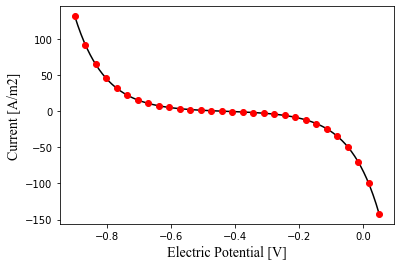

In [184]:
fig1, ax1 = plt.subplots()
ax1.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k')
ax1.plot(E_validate,i_validate,'ro',linewidth = 1.5)
ax1.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax1.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

Text(0, 0.5, 'Current [A/m2]')

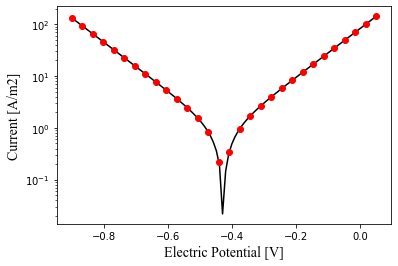

In [185]:
fig2, ax2 = plt.subplots()
ax2.semilogy(delta_phi,abs(i_elementary),linewidth = 1.5,color = 'k')
ax2.semilogy(E_validate,abs(i_validate),'ro',linewidth = 1.5)
ax2.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax2.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

### Discussion:

Add some text to _THIS MARKDOWN BLOCK_ to discuss the plots above.  

Do they make sense, and match with your understanding of the theory?  In what ways? Do they match the validatiopn data?  If not, what might be missing from your code?


The calculated mass action data matches the validation data. 
As delta phi increases, k_fwd decreases and k_rev increases. Furthermore, at low delta_phi, the reverse reaction dominates, while at high delta_phi, the forward reaction dominates. In moving from the forward dominated to reverse dominated condition, there is a potential that causes the forward and reverse to be in equilibrium, resulting in zero current. 

## ii. Part 2: Butler-Volmer kinetics  

Now use your derivation to calculate $i_\circ$ as a function of your elementary kinetic parameters, and then calculate the currents for the same range of potentials.

Add some code to the block below:

In [186]:
ln= np.log
X_H_Ni = 0.6
X_H2O_Ni = 0.2
X_Vac_Ni = 0.2
X_Vac_elyte = 0.08
X_Ox_elyte = 0.92

i_BV = np.zeros_like(delta_phi)

i_0= n_elec*F*(k_fwd**(1-beta))*(k_rev**beta)*(C_fwd**(1-beta))*(C_rev**beta)

delta_g_rxn= delta_g_0+R*T*ln((X_Vac_elyte*X_H2O_Ni*X_Vac_Ni/(X_Ox_elyte*X_H_Ni**2)))

delta_phi_eq= -delta_g_rxn/n_elec/F

print('i_0 =',i_0)
print('delta_g_rxn =',delta_g_rxn)
print('delta_phi_eq = ', delta_phi_eq)


for ind, E in enumerate(delta_phi):
    
    eta= delta_phi[ind]-delta_phi_eq
    
    i_BV[ind] = i_0*(exp(-beta*n_elec*F*eta/R/T)-exp((1-beta)*n_elec*F*eta/R/T))

i_0 = -0.8047559339909194
delta_g_rxn = -82695036.95825559
delta_phi_eq =  -0.4285383062561828


#### Let's plot the BV and Marcus currents together:

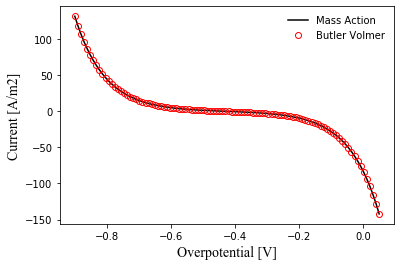

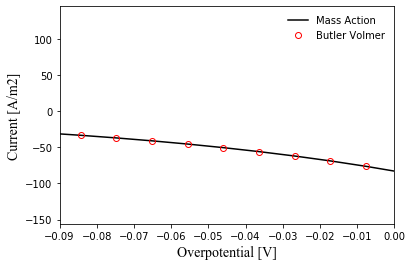

Text(0, 0.5, 'Current [A/m2]')

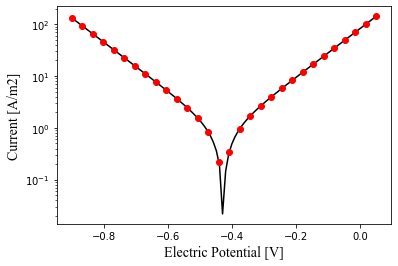

In [187]:
plt.close('all')
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.show()

plt.close('all')
plt.xlim(-.09, 0)
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.show()

fig2, ax2 = plt.subplots()
ax2.semilogy(delta_phi,abs(i_elementary),linewidth = 1.5,color = 'k')
ax2.semilogy(E_validate,abs(i_validate),'ro',linewidth = 1.5)
ax2.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax2.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

#### Discussion:

Discuss your plots.  Make new plots, as desired, to aid in your discussion and highlight noteworthy results.

How do you feel about the assumption of constant $i_\circ$?  Are there situations where this is _not_ a good assumption?

The BV plot matches the mass action plot. Just like we determined from the derivation in part two of the homework, the two equations are equal. 
The assumption of constant $i_\circ$ would not be appropriate if the nature of the electrode changes during operation. This could include passivating oxides or adsorbed species which could change the composition of the electrode and how electrons are transferred. If the assumption is made that the electrode does not experience any change, then a constant $i_\circ$ is acceptable. 

### C. Tafel current

We can re-use the same parameters ($i_\circ$, $\beta$, etc.) from the Butler-Volmer expression to calculate the current using the Tafel approximation:

In [188]:
i_Tafel = np.zeros_like(delta_phi)

for ind, E in enumerate(delta_phi):
    
    eta= delta_phi[ind]-delta_phi_eq
    
    i_Tafel[ind] = i_0*exp(-beta*n_elec*F*eta/R/T)

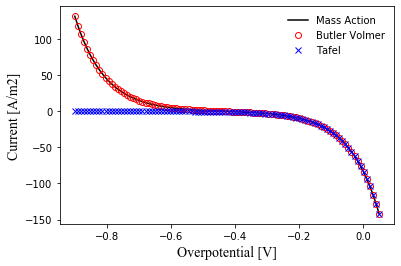

In [189]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.show()

### Disucssion: 
What do you notice, from these results?  What from the theory can explain what you sese.

#### Play with the limits, below, to highlight trends which support your discussion claims.

Feel free to copy the following code block and zoom in on different regions.




The tafel approximation is valid at large potentials. The tafel starts to deviate from the BV equation at around -0.35 V. Once the current gets close to zero, the tafel approximation begins to deviate because the reverse rate starts to have an impact on the current. The tafel only approximates the forward rate (or reverse rate depending on the range of potentials in question). At high potentials, the tafel graph is right at the BV and mass action equations.

#### Discussion:


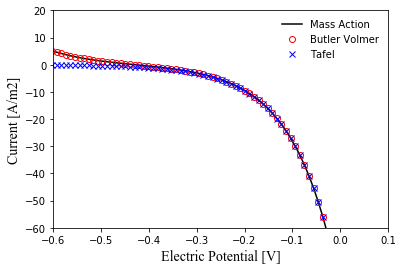

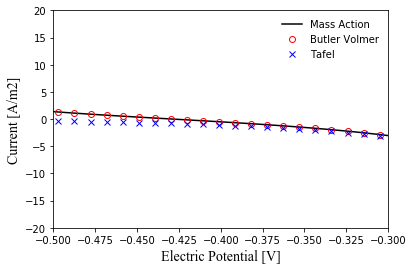

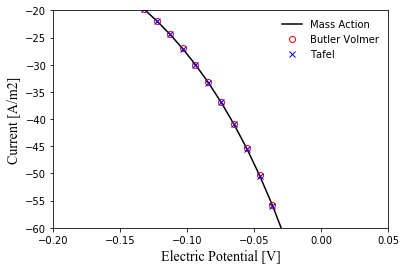

In [190]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.6,0.1))
plt.ylim((-60,20))
plt.show()

plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.5,-0.3))
plt.ylim((-20,20))
plt.show()

plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.2,0.05))
plt.ylim((-60,-20))
plt.show()